# <font color='green'>Machine learning - Previsão de campanha </font>

# <font color='black'>Previsão machine learning no marketing digital </font>

 **Contexto**
 
 
Um modelo de resposta pode fornecer um impulso significativo para a eficiência de uma campanha de marketing, aumentando as respostas ou reduzindo despesas. O objetivo é prever quem responderá a uma oferta de um produto ou serviço

**Conteúdo**

AcceptedCmp1 - 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário,
AcceptedCmp2 - 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário,
AcceptedCmp3 - 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário,
AcceptedCmp4 - 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário,
AcceptedCmp5 - 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

Resposta (alvo) - 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário
Reclame - 1 se o cliente reclamar em últimos 2 anos
DtCustomer - data de inscrição do cliente na empresa
Educação - grau de instrução do
cliente Conjugal - estado civil do cliente
Kidhome - número de crianças pequenas na família do cliente
Teenhome - número de adolescentes na família do cliente
Renda - renda familiar anual do cliente
MntFishProducts - quantia gasta em produtos de peixe nos últimos 2 anos
MntMeatProducts - quantia gasta em produtos cárneos nos últimos 2 anos
MntFruits - montante gasto em produtos de frutas nos últimos 2 anos
MntSweetProducts - valor gasto em produtos doces nos últimos 2 anos
MntWines - valor gasto em produtos de vinho nos últimos 2 anos
MntGoldProds - valor gasto em produtos de ouro nos últimos 2 anos
NumDealsPurchases - número de compras feito com desconto
NumCatalogPurchases - número de compras feitas usando o catálogo
NumStorePurchases - número de compras feitas diretamente nas lojas
NumWebPurchases - número de compras feitas através do site da empresa
NumWebVisitsMonth - número de visitas ao site da empresa no último mês
Recência - número de dias desde a última compra.

**Inspiração**
O objetivo principal é treinar um modelo preditivo que permita à empresa maximizar o lucro da próxima campanha de marketing.

**Campanhas de MK**

AcceptedCmp2

AcceptedCmp3

AcceptedCmp4

AcceptedCmp5

**Número de compras feitas**

MntGoldProds

NumDealsPurchases

NumWebVisitsMonth

In [1]:
from platform import python_version

print('Versão do Python neste projeto:', python_version())

Versão do Python neste projeto: 3.7.4


In [2]:
!pip install -q -U watermark

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib as m
import matplotlib.pyplot as plt

In [4]:
%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

pandas    : 1.2.0
numpy     : 1.18.2
matplotlib: 3.1.1
seaborn   : 0.9.0



In [5]:
plt.style.use('seaborn-darkgrid')
sns.set_style("darkgrid") 

In [6]:
df = pd.read_csv("marketing_campaign.csv", sep = ";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [8]:
df.drop('Response', axis = 1, inplace = True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,3,11
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,3,11
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,3,11
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,3,11
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,3,11


# Análise Exploratória

In [9]:
df.shape

(2240, 28)

In [10]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
dtype: int64

In [11]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
dtype: object

In [12]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0


In [13]:
corr = df.corr()
corr

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN


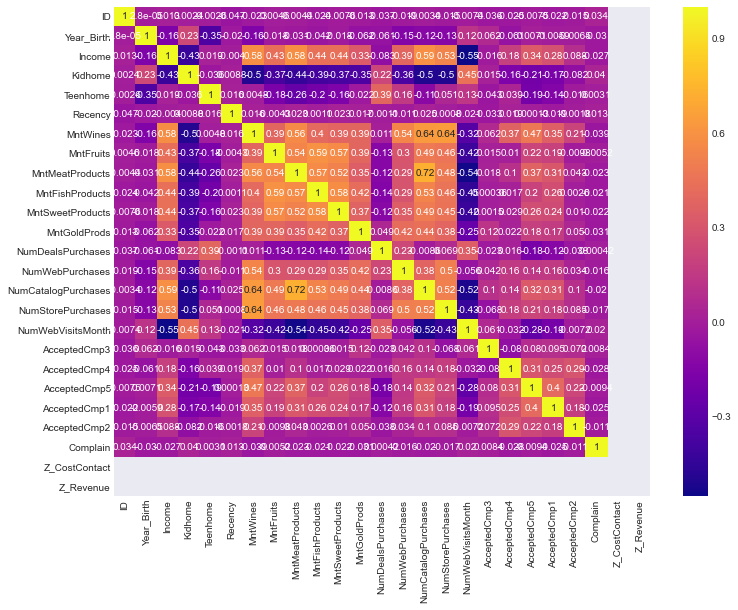

In [14]:
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corr,  cmap = 'plasma', annot= True);
plt.show()

C:\Users\RafaelHenriqueGallo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\RafaelHenriqueGallo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


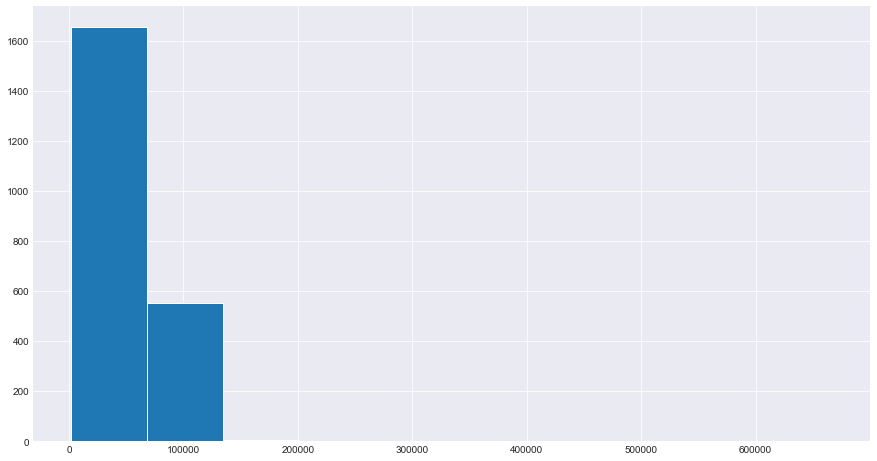

In [15]:
plt.figure(figsize=(15, 8))

plt.hist(df["Income"]);

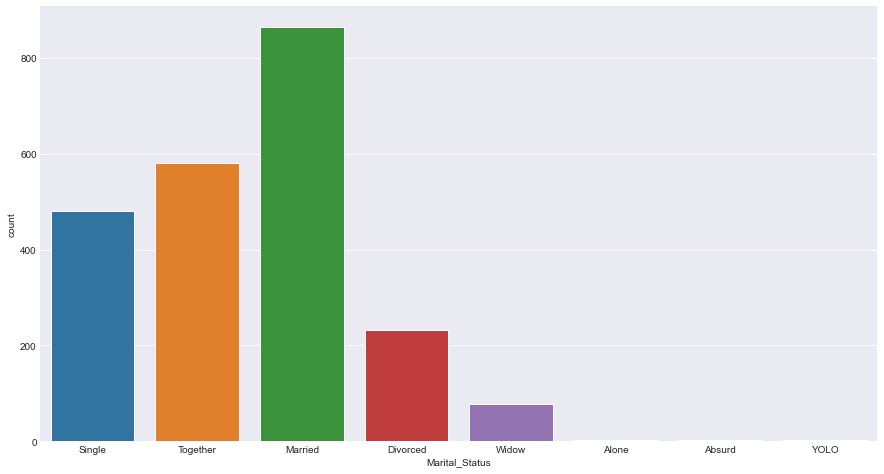

In [16]:
plt.figure(figsize=(15, 8))

sns.countplot(df["Marital_Status"])

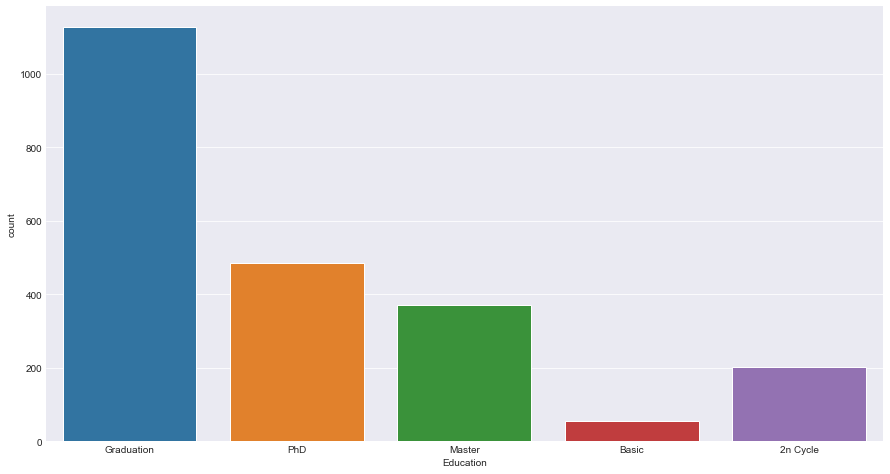

In [17]:
plt.figure(figsize=(15, 8))

sns.countplot(df["Education"])

Text(0, 0.5, 'Idades dos úsuarios')

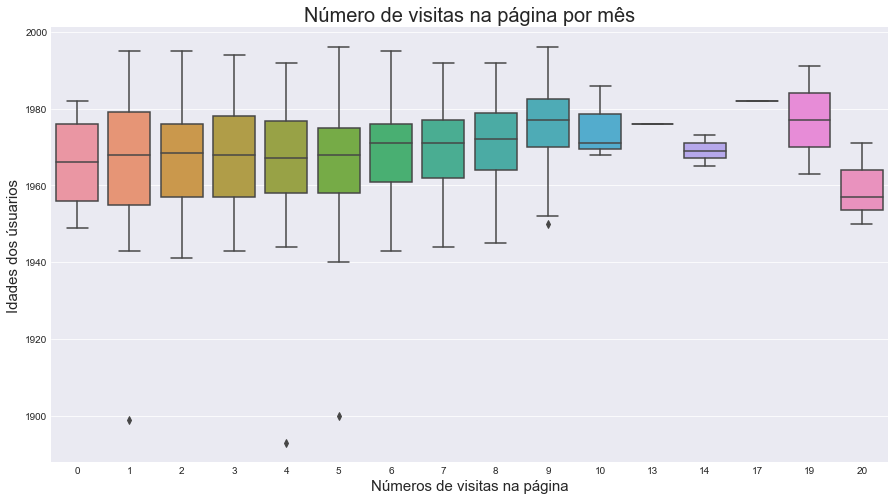

In [18]:
plt.figure(figsize=(15, 8))

sns.boxplot(x = "NumWebVisitsMonth", y = "Year_Birth", data=df)
plt.title("Número de visitas na página por mês", fontsize = 20)
plt.xlabel("Números de visitas na página", fontsize = 15)
plt.ylabel("Idades dos úsuarios", fontsize = 15)

Text(0.5, 0, 'Idades dos úsuarios')

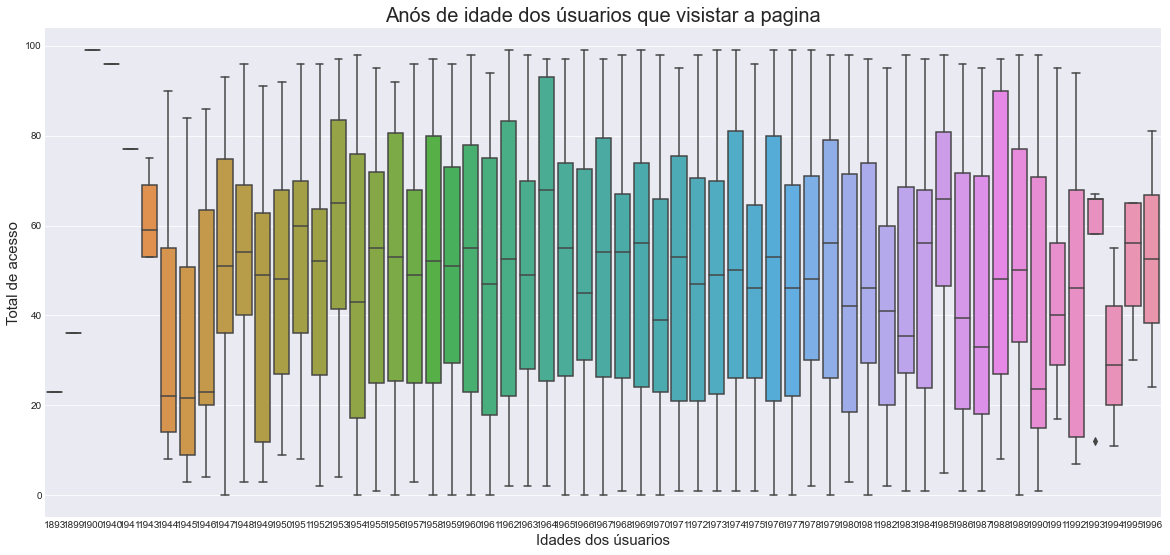

In [19]:
plt.figure(figsize=(20, 9))

sns.boxplot(x = "Year_Birth", y = "Recency", data=df)
plt.title("Anós de idade dos úsuarios que visistar a pagina", fontsize = 20)
plt.ylabel("Total de acesso", fontsize = 15)
plt.xlabel("Idades dos úsuarios", fontsize = 15)

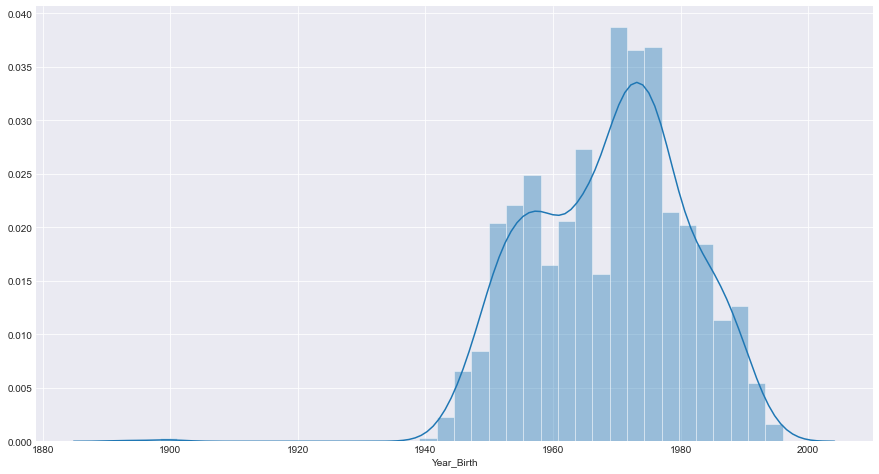

In [20]:
plt.figure(figsize=(15, 8))

sns.distplot(df["Year_Birth"])

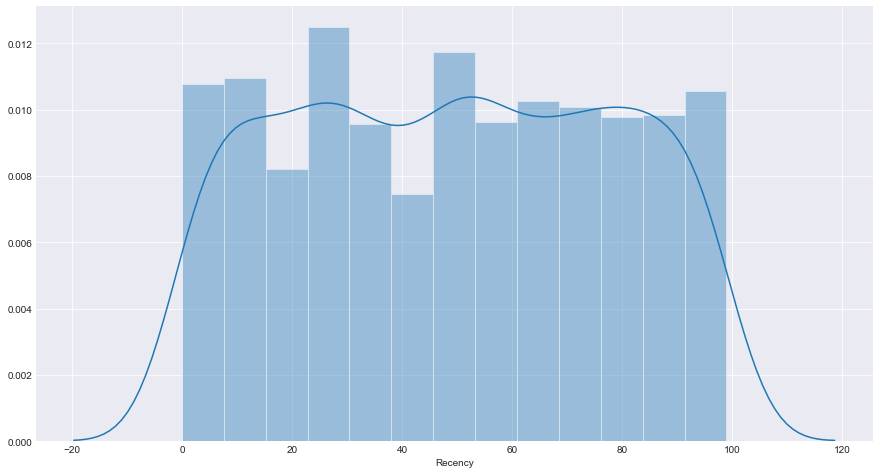

In [21]:
plt.figure(figsize=(15, 8))

sns.distplot(df["Recency"])

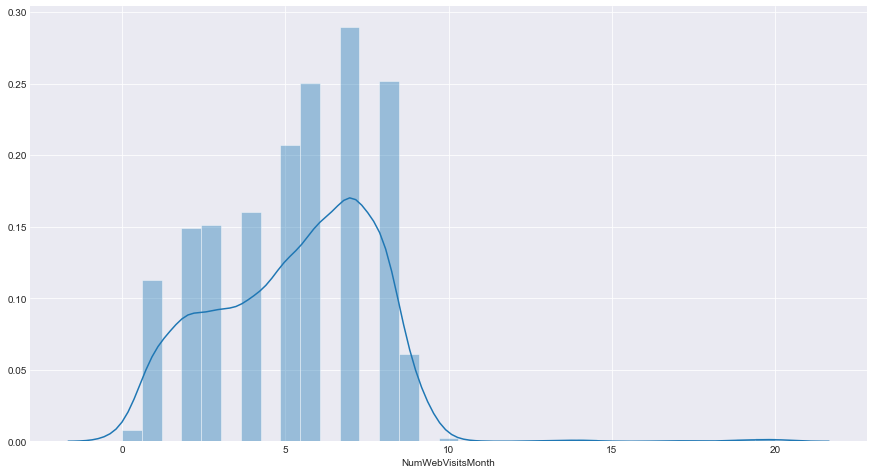

In [22]:
plt.figure(figsize=(15, 8))

sns.distplot(df["NumWebVisitsMonth"])

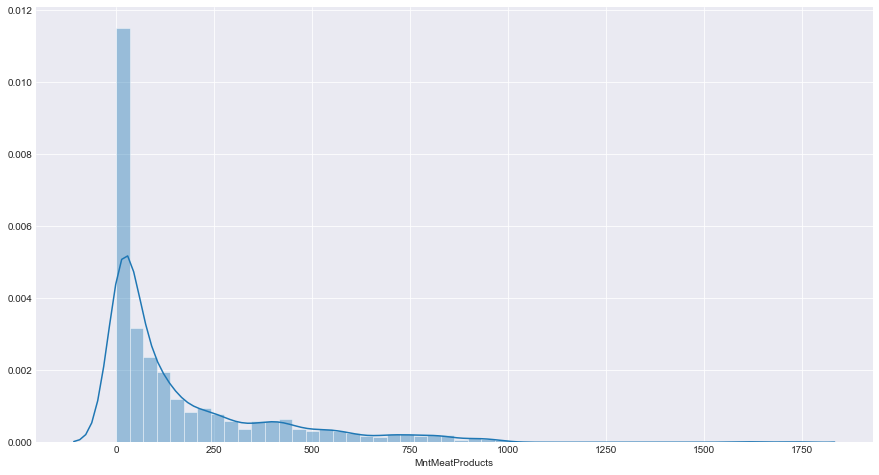

In [23]:
plt.figure(figsize=(15, 8))

sns.distplot(df["MntMeatProducts"])

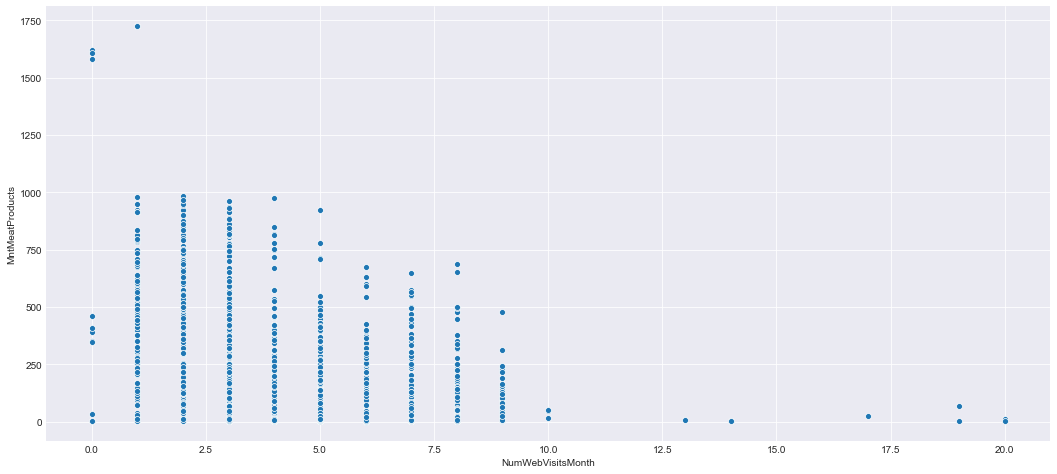

In [24]:
plt.figure(figsize=(18, 8))

sns.scatterplot(x = "NumWebVisitsMonth", y = "MntMeatProducts", data=df)

# Treino e Teste

In [67]:
x = df[["NumWebVisitsMonth", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", ]]
y = df["NumStorePurchases"]

In [123]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

In [124]:
x_train.shape

(1120, 4)

In [125]:
y_train.shape

(1120,)

In [126]:
x_test.shape

(1120, 4)

In [127]:
y_test.shape

(1120,)

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_escaler_x = scaler.fit_transform(x_train)
test_escaler_y = scaler.transform(x_test)

In [129]:
train_escaler_x

array([[-1.38840073, -0.70769419, -0.05265244,  0.39661734],
       [ 0.72323536,  0.37216616,  2.41917489, -0.25139348],
       [-1.38840073, -0.70769419, -0.05265244,  0.72062274],
       ...,
       [ 0.72323536, -0.70769419, -0.75888882, -0.57539889],
       [-0.96607351,  1.4520265 ,  0.65358394,  0.72062274],
       [-1.81072795, -1.24762436, -1.46512521,  8.17274715]])

In [130]:
test_escaler_y

array([[-0.12141908,  0.37216616,  1.00670213,  1.69263897],
       [ 0.30090814,  1.4520265 ,  0.30046575, -0.57539889],
       [ 0.30090814, -0.16776402,  1.00670213,  2.34064979],
       ...,
       [ 1.5678898 , -0.70769419, -0.40577063, -0.8994043 ],
       [-0.96607351, -0.70769419, -0.05265244,  2.34064979],
       [ 1.14556258, -0.16776402, -1.11200702, -0.8994043 ]])

# Modelo de machine learning - regressão linear

In [131]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_fit = model_linear.fit(x_train, y_train)
model_pred = model_linear.predict(x_train)
model_pred

array([7.15871283, 7.94906969, 7.32240529, ..., 3.56017659, 8.50037668,
       9.63885752])

In [132]:
model_linear.intercept_

5.506423559216349

In [133]:
model_linear.coef_

array([-0.4509549 ,  0.19406048,  0.42634219,  0.16369246])

In [134]:
model_linear.coef_ * 27.74456356 + model_linear.intercept_

array([-7.00512326, 10.89054679, 17.33510149, 10.0479994 ])

In [135]:
y_pred = model_linear.predict(x_test)
y_pred

array([8.12776549, 6.06639996, 7.81013504, ..., 2.92091652, 7.68991269,
       2.71324752])

In [136]:
# Grafico

pred = model_linear.predict(x_train)
pred

array([7.15871283, 7.94906969, 7.32240529, ..., 3.56017659, 8.50037668,
       9.63885752])

In [137]:
pred2 = y_train - pred
pred2

1902   -1.158713
1539    4.050930
1105    3.677595
2090    1.996434
1879    7.568861
          ...   
1033    0.480813
1731   -0.682880
763    -1.560177
835     3.499623
1653   -9.638858
Name: NumStorePurchases, Length: 1120, dtype: float64

Text(0, 0.5, 'Total de campanhas')

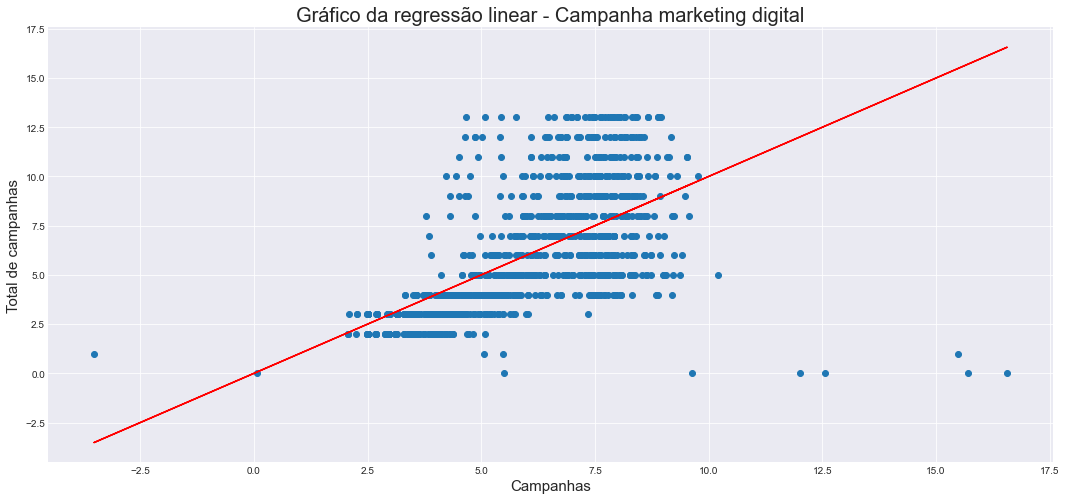

In [139]:
plt.figure(figsize=(18, 8))

plt.scatter(pred, y_train)
plt.plot(pred, model_linear.predict(x_train), color = "red")
plt.title("Gráfico da regressão linear - Campanha marketing digital", fontsize = 20)
plt.xlabel("Campanhas", fontsize = 15)
plt.ylabel("Total de campanhas", fontsize = 15)

# **RMSE** **MSE** **MAE** **R2**

In [140]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import metrics
from math import sqrt

print('MSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2", r2_score(y_test, y_pred))

MSE: 2.3531344403990446
MAE: 1.7348592940588914
RMSE 2.3531344403990446
R2 0.4895710984622823


# Previsão de Clientes

In [141]:
x_test[0:1]

,NumWebVisitsMonth,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases
670,5,3,7,8


In [142]:
pred_x = x_test[0: 2]
pred_x

,NumWebVisitsMonth,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases
670,5,3,7,8
570,6,5,5,1


In [143]:
pred = model_linear.predict(pred_x)[0]
pred

8.127765492070703

# Salvando o modelo de regressão linear

In [144]:
import pickle

saida = open("modelo_previsao_Marketing digital_campanha", "wb")
saida.close()